![](../Photos/employee_burnout_cropped.png)

# Predicting Employee Attrition Using Decision Trees and Random Forests

## Business Understanding
**Employees** leave companies or organizations for different reasons every day. Employees are also the heart of any company - without employees, work doesn't get done, and money doesn't get made. 

If an organization's **upper leadership and/or human resources staff** can determine why an employee may leave, they can use this information to **create more effective hiring and retention practices.** 

## Data Understanding
The data used in this project was retrieved from Kaggle (https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) but was originally collected by IBM's human resources department. 

This data is in the form of a survey given to employees. The features are relatively self-explanatory, but there isn't much information regarding where this data was collected from other than what was previously mentioned. 

The features shown below can be later used to train predictive models to determine whether an employee will leave a company. After tuning and other improvements, this could be useful for upper leadership and/or human resources staff to identify changes that need to be made to more effectively hire or retain employees. 

- Present the size of the dataset, descriptive statistics for all features used in the analysis
- Justify the inclusion of features based on their properties, relevance for project
- Identify any limitations of data that have implications for the project

#### Import needed libraries and load in dataset

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

# setting seed variable
seed = 13

# loading in csv
df = pd.read_csv("../Data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# display number of rows, cols in dataset
# 1470 rows, 35 rows (features)
df.shape

(1470, 35)

In [54]:
# display first 10 rows of data
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


### Data Preparation and Descriptive Analysis
Features used in this project include: 

 **Feature**                | **Description**                                                                                        
:----------------------------|:--------------------------------------------------------------------------------------------------------
 Age                        | Employee's age                                                                                         
 Education                  | Employee's level of education, encoded from 1-5 (assuming 1 is high school, 5 is PhD and beyond)       
 Environment Satisfaction   | Employee's satisfaction with work environment on scale from 1-4                                        
 Gender                     | Employee's gender                                                                                      
 Hourly Rate                | Employee's hourly pay rate                                                                             
 Job Involvement            | Employee's level of involvement in their job on a scale from 1-4                                       
 Job Level                  | Employee's job level on encoded on a scale of 1-5, where 1 is the most junior and 5 is the most senior 
 Job Role                   | Employee's job position                                                                                
 Job Satisfaction           | Employee's overall job satisfaction on a scale from 1-4                                                
 Marital Status             | Employee's marital status, can be married, divorced, or single                                         
 Monthly Income             | Employee's monthly take home pay (assuming before taxes, based on number of hours worked)              
 Performance Rating         | Employee's performance rating on a scale from 1-4                                                      
 Relationship Satisfaction  | Employee's satisfaction with their relationship(s) with others at work on a scale from 1-4             
 Work Life Balance          | Employee's perception of work-life balance on a scale from 1-4                                         
 Years at Company           | Number of years worked at the company (IBM)                                                            
 Years in Current Role      | Number of years in employee's current position                                                         
 Years Since Last Promotion | Number of years since employee's last promotion                                     

*Note that* **attrition** *is the target feature this project aims to predict based on the features above.*

In [55]:
# remove columns not used in analysis
df = df[['Age', 'Attrition', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']]
df.head(10)

,Age,Attrition,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,2,2,Female,94,3,2,Sales Executive,4,Single,5993,3,1,1,6,4,0
1,49,No,1,3,Male,61,2,2,Research Scientist,2,Married,5130,4,4,3,10,7,1
2,37,Yes,2,4,Male,92,2,1,Laboratory Technician,3,Single,2090,3,2,3,0,0,0
3,33,No,4,4,Female,56,3,1,Research Scientist,3,Married,2909,3,3,3,8,7,3
4,27,No,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,3,4,3,2,2,2
5,32,No,2,4,Male,79,3,1,Laboratory Technician,4,Single,3068,3,3,2,7,7,3
6,59,No,3,3,Female,81,4,1,Laboratory Technician,1,Married,2670,4,1,2,1,0,0
7,30,No,1,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,4,2,3,1,0,0
8,38,No,3,4,Male,44,2,3,Manufacturing Director,3,Single,9526,4,2,3,9,7,1
9,36,No,3,3,Male,94,3,2,Healthcare Representative,3,Married,5237,3,2,2,7,7,7


#### Encoding Columns
The "Attrition", "Gender", "JobRole", and "MaritalStatus" columns need to be encoded in order to be used in the prediction of the "Attrition" target feature. 

In [56]:
# method to encode a column of values
def encode_column(dataframe, col_name):
    label_encoder = LabelEncoder()
    label_encoder.fit(dataframe)
    labeled_vals = label_encoder.transform(dataframe)
    label_df = pd.DataFrame(labeled_vals, columns=[col_name])
    return label_df

In [57]:
# encoding Attrition (target variable), Gender, JobRole, and MaritalStatus
cols_to_encode = ['Attrition', 'Gender', 'JobRole', 'MaritalStatus']

for i in cols_to_encode:
    # encode columns and append to existing dataframe
    df[i + 'Encoded'] = encode_column(df[i], i)   
    
# remove unneeded cols
df = df.drop(df[cols_to_encode], axis=1)

df.head(10)

,Age,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,AttritionEncoded,GenderEncoded,JobRoleEncoded,MaritalStatusEncoded
0,41,2,2,94,3,2,4,5993,3,1,1,6,4,0,1,0,7,2
1,49,1,3,61,2,2,2,5130,4,4,3,10,7,1,0,1,6,1
2,37,2,4,92,2,1,3,2090,3,2,3,0,0,0,1,1,2,2
3,33,4,4,56,3,1,3,2909,3,3,3,8,7,3,0,0,6,1
4,27,1,1,40,3,1,2,3468,3,4,3,2,2,2,0,1,2,1
5,32,2,4,79,3,1,4,3068,3,3,2,7,7,3,0,1,2,2
6,59,3,3,81,4,1,1,2670,4,1,2,1,0,0,0,0,2,1
7,30,1,4,67,3,1,3,2693,4,2,3,1,0,0,0,1,2,0
8,38,3,4,44,2,3,3,9526,4,2,3,9,7,1,0,1,4,2
9,36,3,3,94,3,2,3,5237,3,2,2,7,7,7,0,1,0,1


#### Encoded Values and Their Meanings
**Attrition**

 **Value** | **Encoding** 
-----------|--------------
 No        | 0            
 Yes       | 1            

**Gender**

 **Value** | **Encoding** 
-----------|--------------
 Female    | 0            
 Male      | 1            


**JobRole**

 **Value**                 | **Encoding** 
---------------------------|--------------
 Healthcare Representative | 0            
 Human Resources           | 1            
 Laboratory Technician     | 2            
 Manager                   | 3            
 Manufacturing Director    | 4            
 Research Director         | 5            
 Research Scientist        | 6            
 Sales Executive           | 7            
 Sales Representative      | 8            

**Marital Status**

 **Value** | **Encoding** 
-----------|--------------
 Divorced  | 0            
 Married   | 1            
 Single    | 2            

### Descriptive Analysis of Features Included in Analysis
For encoded variables, only a percentage of each feature will be presented. For non-encoded variables, descriptive features such as mean, min and max will be presented.

In [58]:
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [59]:
df['Education'].describe()

count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

In [60]:
df['EnvironmentSatisfaction'].describe()

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

In [61]:
df['HourlyRate'].describe()

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

In [62]:
df['JobInvolvement'].describe()

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

In [63]:
df['JobLevel'].describe()

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

In [64]:
df['JobSatisfaction'].describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

In [65]:
df['PerformanceRating'].describe()

count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

In [66]:
df['RelationshipSatisfaction'].describe()

count    1470.000000
mean        2.712245
std         1.081209
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: RelationshipSatisfaction, dtype: float64

In [67]:
df['WorkLifeBalance'].describe()

count    1470.000000
mean        2.761224
std         0.706476
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

In [68]:
df['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [69]:
df['YearsInCurrentRole'].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

In [70]:
df['YearsSinceLastPromotion'].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [77]:
# results are in percentages
# for example: 83.88% of employees in this dataset left the company
df['AttritionEncoded'].value_counts() / 1470 * 100

0    83.877551
1    16.122449
Name: AttritionEncoded, dtype: float64

In [73]:
df['GenderEncoded'].value_counts() / 1470 * 100

1    60.0
0    40.0
Name: GenderEncoded, dtype: float64

In [78]:
# see above JobRole encoding table for number meanings
df['JobRoleEncoded'].value_counts() / 1470 * 100

7    22.176871
6    19.863946
2    17.619048
4     9.863946
0     8.911565
3     6.938776
8     5.646259
5     5.442177
1     3.537415
Name: JobRoleEncoded, dtype: float64

In [76]:
df['MaritalStatusEncoded'].value_counts() / 1470 * 100

1    45.782313
2    31.972789
0    22.244898
Name: MaritalStatusEncoded, dtype: float64

### Data Limitations
Although this is a relatively large dataset when you think about surveying 1470 employees, that is a small number when trying to train a machine learning model to predict something as important as whether an employee will leave a company. A larger dataset would have been preferred to get more accurate results from the below machine learning models. 

Finding where this data was collected from or how it was collected was difficult even with extensive research. To improve this analysis, it would be preferred to conduct a new survey with a larger number of employees and train the following models on that data. 

## Modeling and Evaluation
In this analysis, both decision tree and random forest models are used. A baseline decision tree model is trained first to compare tuned results to. A random forest model (essentially multiple decision trees put together) is then used to try and further improve performance.

This analysis uses 5 main methods of evaluating the machine learning models used in this project:

 **Method of Evaluation** | **Meaning**                                                                        
:--------------------------|:------------------------------------------------------------------------------------
 Accuracy                 | Number of correct predictions out of total number of predictions                   
 Precision                | Number of correct positive predictions out of number of total positive predictions 
 Recall                   | Model's ability to correctly predict a true positive                               
 Area Under Curve (AUC)   | Model's ability to distinguish between positive and negative                       
 Confusion Matrix         | Visualization of model's predictions                                               



### Baseline Model

In [79]:
# splitting target and feature variables into separate dataframes
y = df['AttritionEncoded']
X = df.drop(columns=['AttritionEncoded'], axis=1)

# leaving default of test_size = .25, train_size = .75
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [80]:
# there is also a large class imbalance that will be addressed later
# training data
print("Training data:")
# printing out number of employees who stayed (0) and number who left (1)
print(y_train.value_counts())

# testing data
print("\nTesting data:")
print(y_test.value_counts())

Training data:
0    923
1    179
Name: AttritionEncoded, dtype: int64

Testing data:
0    310
1     58
Name: AttritionEncoded, dtype: int64


In [84]:
# training classifier object
attrition_classifier_1 = DecisionTreeClassifier(criterion = 'entropy', random_state = seed)
attrition_classifier_1.fit(X_train, y_train)

# make first predicitons
y_pred = attrition_classifier_1.predict(X_test)

In [94]:
# defining method for easy evaluation of each model
def evaluate_model(classifier, X, y, y_test, y_pred):
    # ignoring deprecation warning for plot_confusion_matrix
    import warnings
    warnings.simplefilter('ignore')

    # confusion matrix
    print("Confusion Matrix:")
    plot_confusion_matrix(classifier, X, y)
    plt.show()
    
    # accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print("Accuracy:", accuracy)
    
    # precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision) # want a value close to 1
    
    # recall
    print("Recall:", recall_score(y_test, y_pred))
    
    # AUC
    false_pos, true_pos, thresholds = roc_curve(y_test, y_pred)
    area_under_roc = auc(false_pos, true_pos)
    print("AUC:", area_under_roc) # .54 is pretty close to just random guessing

Confusion Matrix:


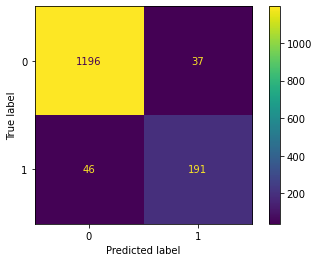

Accuracy: 77.44565217391305
Precision: 0.24489795918367346
Recall: 0.20689655172413793
AUC: 0.5437708565072302


In [95]:
# evaluate first iteration of model
evaluate_model(attrition_classifier_1, X, y, y_test, y_pred)

The accuracy above is not terrible but also not ideal. However, the precision, recall and AUC are not acceptable for a machine learning model used in the real world. 

An AUC of .5 is like random guessing (no distinction between the two classes we are trying to identify). The model also has little ability to predict a true positive (recall) and is not very precise, so all of these metrics need to be improved with the next iteration of the model. 

### Improved Model
As mentioned earlier, there is a large imbalance between employees who stayed and employees who left the company (IBM) in this dataset. This is most likely causing the model to overfit, meaning it is really good at detecting when an employee stays (because it has seen that before many times), but is not as good at detecting when an employee will leave. 

We will use SMOTE (synthetic minority oversampling technique) to balance the dataset. This will increase the number of instances of the lesser-seen class (in this case, employees who left the company) so the model can improve its performance regarding this class. 

In [89]:
# installing imblearn
!pip install imblearn

#### Resampling Data

In [96]:
# using SMOTE to resample data
from imblearn.over_sampling import SMOTE

print("Classifications BEFORE Resample:")
print(y_train.value_counts())

X_train_resample, y_train_resample = SMOTE().fit_resample(X_train, y_train)

# should have same number of each classification
print("\nClassifications AFTER Resample:")
print(pd.Series(y_train_resample).value_counts())

Classifications BEFORE Resample:
0    923
1    179
Name: AttritionEncoded, dtype: int64

Classifications AFTER Resample:
0    923
1    923
Name: AttritionEncoded, dtype: int64


#### Training Baseline Decision Tree Model with Resampled Data

In [137]:
# training classifier object
attrition_classifier_resample = DecisionTreeClassifier(criterion='entropy', random_state=seed)
attrition_classifier_resample.fit(X_train_resample, y_train_resample)

# make predicitons
y_pred_resample = attrition_classifier_resample.predict(X_test)

Confusion Matrix:


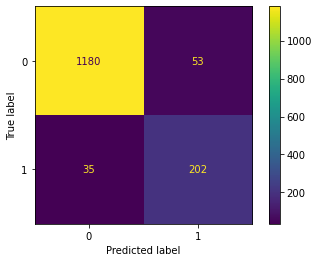

Accuracy: 76.08695652173914
Precision: 0.3026315789473684
Recall: 0.39655172413793105
AUC: 0.6127919911012236


In [138]:
# evaluate model trained with resampled data
evaluate_model(attrition_classifier_resample, X, y, y_test, y_pred_resample)

The above model has slightly worse accuracy but better precision, recall, and AUC scores. Despite the slight improvement, this model is still not ready to be used to predict real-world employee attrition. 

### Final Model Using Random Forests
Because a random forest model is a collection of decision trees working together to classify things more accurately, this will be used as the final iteration of the model we'll use to try and predict employee attrition.

Confusion Matrix:


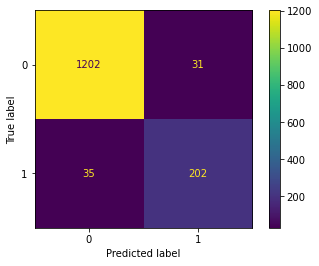

Accuracy: 82.06521739130434
Precision: 0.42592592592592593
Recall: 0.39655172413793105
AUC: 0.6482758620689655


In [140]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators is the number of decision trees used in the forest
attrition_random_forests = RandomForestClassifier(n_estimators = 154, random_state = seed)
attrition_random_forests.fit(X_train_resample, y_train_resample)
y_pred_resample = attrition_random_forests.predict(X_test)

# evaluate random forest model
evaluate_model(attrition_random_forests, X, y, y_test, y_pred_resample)

The final model is relatively more accurate than our baseline model, but not by much. The final model is also more precise, better able to identify a positive classification, and is doing better than the close-to-random guessing our baseline model was doing. 

## Conclusion
This final model above using random forests has overall better scores than both our baseline and resampled models, but is still not accurate or precise enough to be used when making real-world decisions. Overhauling both hiring and retention techniques costs time and money - time and money that might be wasted if the above model predicts either false positives or false negatives. 

This is a good starting point for upper leadership and/or human resources staff at any organization to evaluate whether they are effectively hiring and retaining their employees. However, results can further improve by collecting better data, further tuning models, and using more rigorous technologies such as neural networks to predict employee attrition.